In [151]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [152]:
twitter_user = ("@BBC", "@CBS", "@CNN", "@Fox", "@nytimes")
sentiments =[]
username = None
oldest_tweet = None

for user in twitter_user:
    public_tweets = api.user_timeline(user, count=100)
    tweet_count = 1       
    for tweet in public_tweets:
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = tweetnumber
        oldest_tweet = tweet['id'] - 1
        sentiments.append({"Username": user,
                           "Text":tweet["text"],
                           "Date": tweet["created_at"],
                           "Compound": compound,
                           "Positive": pos,
                           "Neutral": neu,
                           "Negative": neg,
                           "Tweet Count": tweet_count})
        
        if "Username" == "Username":
            tweet_count +=1
        else:
            tweet_count = 1  

In [153]:
sentiments_df=pd.DataFrame.from_dict(sentiments)
sentiments_df = sentiments_df[["Username", "Tweet Count", "Date", "Compound", "Negative", "Neutral", "Positive", "Text"]]
sentiments_df["Username"] = sentiments_df["Username"].str.replace('@','')
sentiments_df.to_csv('News Mood Data.csv', index=False)

In [154]:
sentiments_df.head()

,Username,Tweet Count,Date,Compound,Negative,Neutral,Positive,Text
0,BBC,1,Mon Apr 23 19:15:23 +0000 2018,0.0,0.0,1.0,0.0,RT @BBCTwo: It's #ShakespearesBirthday so here...
1,BBC,2,Mon Apr 23 18:53:11 +0000 2018,0.0,0.0,1.0,0.0,👶💖 The Duke and Duchess of Cambridge introduce...
2,BBC,3,Mon Apr 23 18:01:04 +0000 2018,0.0,0.0,1.0,0.0,✈️ Do you know how to wear an oxygen mask? ht...
3,BBC,4,Mon Apr 23 16:58:47 +0000 2018,0.0,0.0,1.0,0.0,RT @BBCBreaking: The Duke and Duchess of Cambr...
4,BBC,5,Mon Apr 23 16:23:06 +0000 2018,0.0,0.0,1.0,0.0,❤️ The Duke of Cambridge has arrived at hospit...


<function matplotlib.pyplot.show>

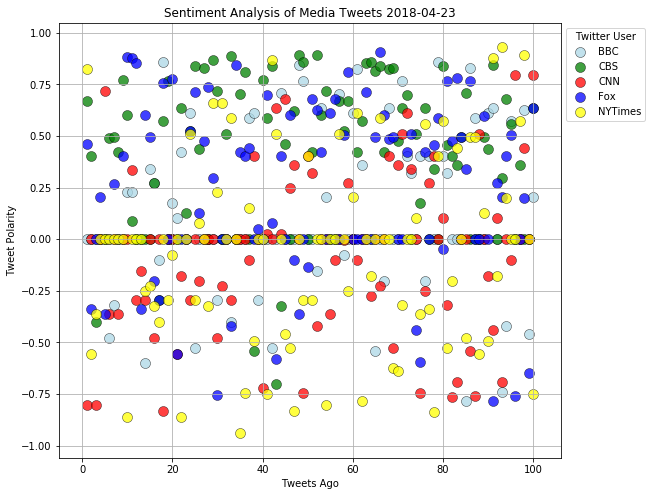

In [155]:
bbc_df = sentiments_df.loc[sentiments_df["Username"] == "BBC"]
cbs_df = sentiments_df.loc[sentiments_df["Username"] == "CBS"]
cnn_df = sentiments_df.loc[sentiments_df["Username"] == "CNN"]
fox_df = sentiments_df.loc[sentiments_df["Username"] == "Fox"]
nytimes_df = sentiments_df.loc[sentiments_df["Username"] == "nytimes"]

compound_bbc = bbc_df["Compound"]
tweet_bbc = bbc_df["Tweet Count"]
compound_cbs = cbs_df["Compound"]
tweet_cbs = cbs_df["Tweet Count"]
compound_cnn = cnn_df["Compound"]
tweet_cnn = cnn_df["Tweet Count"]
compound_fox =fox_df["Compound"]
tweet_fox = fox_df["Tweet Count"]
compound_nytimes = nytimes_df["Compound"]
tweet_nytimes = nytimes_df["Tweet Count"]

fig = plt.figure(figsize=(9,8))

bbc_df = plt.scatter(tweet_bbc, compound_bbc, color="lightblue", s = 100, edgecolors="black", linewidths = .5, label = "BBC", alpha=0.75)
cbs_df = plt.scatter(tweet_cbs, compound_cbs, color="green", s = 100,linewidths = .5, edgecolors="black",label = "CBS", alpha=0.75)
cnn_df = plt.scatter(tweet_cnn, compound_cnn, color="red", s = 100,linewidths = .5, edgecolors="black",label = "CNN", alpha=0.75)
fox_df = plt.scatter(tweet_fox, compound_fox, color="blue", s = 100,linewidths = .5, edgecolors="black",label = "Fox", alpha=0.75)
nytimes_df = plt.scatter(tweet_nytimes, compound_nytimes, s = 100,color="yellow", linewidths = .5, edgecolors="black",label = "NYTimes", alpha=0.75)

plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title(f"Sentiment Analysis of Media Tweets " + (str(datetime.date.today())))
lgnd = plt.legend(bbox_to_anchor = (1,1), title = 'Twitter User') 
plt.grid()
plt.show

<function matplotlib.pyplot.show>

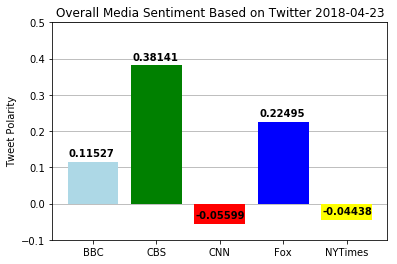

In [156]:
sentiments_groupby=sentiments_df.groupby("Username")["Compound"].mean().round(5)
labels = ("BBC", "CBS", "CNN", "Fox", "NYTimes")
colors = "lightblue", "green", "red", "blue", "yellow"
x_axis = np.arange(len(twitter_user))
plt.gca().yaxis.grid(True)
plt.bar(x_axis, sentiments_groupby, color=colors, align="edge", zorder=3)

tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, labels)
plt.ylim(-.1, .5)
y = sentiments_groupby
for i, v in enumerate(y):
    plt.text(i+.02, v+.015, str(v).format(), color='black', fontweight = 'bold')

plt.title("Overall Media Sentiment Based on Twitter " + (str(datetime.date.today())))

plt.ylabel("Tweet Polarity")

plt.gca().yaxis.grid(True)

plt.show